In [16]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import random
import requests
from matplotlib import pyplot as plt
from tqdm import tqdm
tqdm.pandas()

In [2]:
new = pd.read_csv("aenywhere_dump.csv")
points = pd.read_csv("points.csv")

/var/folders/x9/x6m_v2y54yx2wmzg6z8dczgr0000gn/T/ipykernel_8383/4182016481.py:2: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  points = pd.read_csv("points.csv")


In [3]:
new.head()

,number,waitingtime,distance,from country,from state,from city,from latitude,from longitude,starttime,starttime timestap UTC,to country,to state,to city,to latitude,to longitude,arrivetime,arrivetime timestap UTC
0,1,15,59195,Germany,Schleswig-Holstein,LÃ¼beck,53.8780,10.6685,"Fri, 13 Apr 2018 11:33:00 GMT",1523619180,Germany,Hamburg,Hamburg,53.5595,10.0672,"Fri, 13 Apr 2018 12:34:00 GMT",1523622840
1,2,25,271137,Germany,Hamburg,Hamburg,53.5595,10.0672,"Fri, 13 Apr 2018 12:34:00 GMT",1523622840,Germany,Berlin,Berlin,52.5364,13.2934,"Fri, 13 Apr 2018 15:32:00 GMT",1523633520
2,3,36,33432,Germany,Brandenburg,Michendorf,52.3026,13.0136,"Sat, 14 Apr 2018 08:44:00 GMT",1523695440,Germany,Brandenburg,Mittenwalde,52.3159,13.4941,"Sat, 14 Apr 2018 09:47:00 GMT",1523699220
3,4,25,543592,Germany,Brandenburg,Mittenwalde,52.3159,13.4941,"Sat, 14 Apr 2018 09:47:00 GMT",1523699220,Poland,mazowieckie,Warszawa,52.2788,20.9772,"Sat, 14 Apr 2018 15:48:00 GMT",1523720880
4,5,52,206759,Poland,mazowieckie,Warszawa,52.3072,20.9311,"Mon, 16 Apr 2018 10:19:00 GMT",1523873940,Poland,warmiÅsko-mazurskie,Olsztyn,53.7839,20.5407,"Mon, 16 Apr 2018 14:15:00 GMT",1523888100


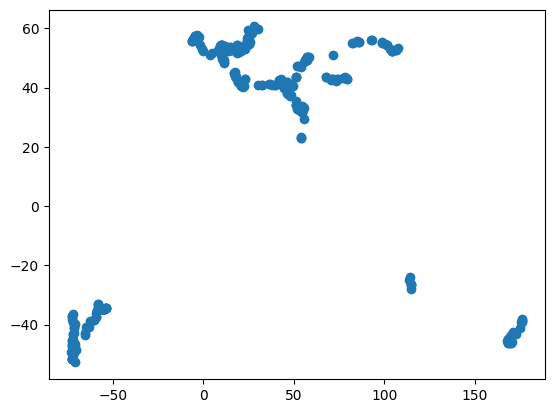

In [ ]:
plt.scatter(new["from longitude"], new["from latitude"])
# aligns with https://www.aenywhere.de/getrampt/ :)

In [4]:
points.head()

,id,lat,lon,rating,country,wait,nickname,comment,datetime,reviewed,banned,ip,dest_lat,dest_lon,signal,ride_datetime,user_id,from_hitchwiki
0,0,40.974714,27.511654,3.0,TR,NaN,Tamergem,"If you avoid the mini busses, you can get on a...",2011-05-26 10:06:17.000000,1,0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,1,32.072756,34.793444,4.0,IL,NaN,NaN,NaN,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,41.727928,27.220731,4.0,TR,NaN,NaN,NaN,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,41.099858,29.007339,3.0,TR,NaN,Xavierallard,There is a lot of traffic there and little spa...,2011-03-15 12:52:11.000000,1,0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,4,30.169989,66.999612,3.0,PK,NaN,NaN,NaN,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
points.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60313 entries, 0 to 60312
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              60313 non-null  int64  
 1   lat             60313 non-null  float64
 2   lon             60313 non-null  float64
 3   rating          60313 non-null  float64
 4   country         60307 non-null  object 
 5   wait            29423 non-null  float64
 6   nickname        25784 non-null  object 
 7   comment         42079 non-null  object 
 8   datetime        53073 non-null  object 
 9   reviewed        60313 non-null  int64  
 10  banned          60313 non-null  int64  
 11  ip              0 non-null      float64
 12  dest_lat        9188 non-null   float64
 13  dest_lon        9150 non-null   float64
 14  signal          3520 non-null   object 
 15  ride_datetime   505 non-null    object 
 16  user_id         787 non-null    float64
 17  from_hitchwiki  44433 non-null 

In [6]:
points["datetime"] = pd.to_datetime(points["datetime"])
# TODO https://github.com/bopjesvla/hitch/issues/153 see below
# points["ride_datetime"] = pd.to_datetime(points["ride_datetime"], format="mixed", yearfirst=True)

In [7]:
points[points["ride_datetime"] == "0025-03-07T08:00"]

,id,lat,lon,rating,country,wait,nickname,comment,datetime,reviewed,banned,ip,dest_lat,dest_lon,signal,ride_datetime,user_id,from_hitchwiki
57473,6654082449690107442,-33.804661,19.872288,1.0,ZA,180.0,NaN,ahead Terura loko. Dekoj da homoj alvenas ĉium...,2025-03-11 12:40:16.005680,0,0,NaN,-33.804661,19.872288,sign,0025-03-07T08:00,221.0,NaN


In [8]:
import_df = pd.DataFrame(
    columns=[
        "lat",
        "lon",
        "rating",
        "country",
        "wait",
        "nickname",
        "comment",
        "datetime",
        "reviewed",
        "banned",
        "ip",
        "dest_lat",
        "dest_lon",
        "signal",
        "ride_datetime",
        "user_id",
        "from_hitchwiki",
    ]
)

In [9]:
def generate_comment(row):
    return (
        f"From {row["from city"]}, {row["from state"]}, {row["from country"]} to {row["to city"]}, {row["to state"]}, {row["to country"]}. "
        + "Read about it on https://www.aenywhere.de"
    )

def get_country(row):
    lat = row["lat"]
    lon = row["lon"]
    for _ in range(10):
        resp = requests.get(
            "https://nominatim.openstreetmap.org/reverse",
            {
                "lat": lat,
                "lon": lon,
                "format": "json",
                "zoom": 3,
                "email": "info@hitchmap.com",
            },
        )
        if resp.ok:
            break
        else:
            print(resp)

    res = resp.json()
    country = "XZ" if "error" in res else res["address"]["country_code"].upper()
    return country

In [10]:
import_df["id"] = [random.randint(0, 2**63) for _ in range(len(new))]
import_df["lat"] = new["from latitude"]
import_df["lon"] = new["from longitude"]
import_df["country"] = import_df.progress_apply(get_country, axis=1)
import_df["dest_lat"] = new["to latitude"]
import_df["dest_lon"] = new["to longitude"]
import_df["rating"] = np.nan
import_df["wait"] = new["waitingtime"]
import_df["nickname"] = "aenywhere" # TODO generate this user with hitchmap mail adress, wont do it himself
import_df["comment"] = new.apply(generate_comment, axis=1)
import_df["reviewed"] = 1
import_df["banned"] = 0
import_df["ip"] = np.nan
import_df["signal"] = np.nan
import_df["datetime"] = dt.now()
import_df["ride_datetime"] = pd.to_datetime(new["starttime"])
# import_df["arrival_datetime"] = new["arrivetime"] TODO add new col
# import_df["user_id"] = TODO
import_df["from_hitchwiki"] = 0
# import_df["from_bulk_import"] = 1 TODO add such a column or a "source" column that also incorporates from_hitchwiki

100%|██████████| 429/429 [07:07<00:00,  1.00it/s]


In [11]:
points = pd.concat([points, import_df])

/var/folders/x9/x6m_v2y54yx2wmzg6z8dczgr0000gn/T/ipykernel_8383/2521978694.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  points = pd.concat([points, import_df])


In [12]:
points.head()

,id,lat,lon,rating,country,wait,nickname,comment,datetime,reviewed,banned,ip,dest_lat,dest_lon,signal,ride_datetime,user_id,from_hitchwiki
0,0,40.974714,27.511654,3.0,TR,NaN,Tamergem,"If you avoid the mini busses, you can get on a...",2011-05-26 10:06:17,1,0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,1,32.072756,34.793444,4.0,IL,NaN,NaN,NaN,NaT,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,41.727928,27.220731,4.0,TR,NaN,NaN,NaN,NaT,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,41.099858,29.007339,3.0,TR,NaN,Xavierallard,There is a lot of traffic there and little spa...,2011-03-15 12:52:11,1,0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,4,30.169989,66.999612,3.0,PK,NaN,NaN,NaN,NaT,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
points.tail()

,id,lat,lon,rating,country,wait,nickname,comment,datetime,reviewed,banned,ip,dest_lat,dest_lon,signal,ride_datetime,user_id,from_hitchwiki
424,3745868859689189411,53.8304,22.9567,NaN,PL,144.0,aenywhere,"From AugustÃ³w, podlaskie, Polen to Marijampol...",2025-03-16 16:22:48.863741,1,0,NaN,54.5533,23.3759,NaN,2017-08-28 08:15:00,NaN,0.0
425,5279764105982007311,54.5533,23.3759,NaN,LT,58.0,aenywhere,"From MarijampolÄ, MarijampolÄs apskritis, Li...",2025-03-16 16:22:48.863741,1,0,NaN,54.5486,23.4217,NaN,2017-08-28 12:15:00,NaN,0.0
426,4765993241184041377,54.5486,23.4217,NaN,LT,38.0,aenywhere,"From nan, MarijampolÄs apskritis, Litauen to ...",2025-03-16 16:22:48.863741,1,0,NaN,54.6292,23.9584,NaN,2017-08-28 13:18:00,NaN,0.0
427,5195602014491182311,54.6292,23.9584,NaN,LT,22.0,aenywhere,"From Prienai, Kauno apskritis, Litauen to Trak...",2025-03-16 16:22:48.863741,1,0,NaN,54.6688,24.9289,NaN,2017-08-28 14:27:00,NaN,0.0
428,6129825642027130302,53.4879,11.2737,NaN,DE,66.0,aenywhere,"From Bandenitz, Mecklenburg-Vorpommern, German...",2025-03-16 16:22:48.863741,1,0,NaN,53.5598,10.0408,NaN,2019-06-28 13:40:00,NaN,0.0


In [14]:
# TODO replace points on server with this points
points.to_csv("new_points.csv", index=False)